
# **Logistic Regression for Binary Classification**
### This notebook demonstrates logistic regression for a two-class classification problem using Binary Cross-Entropy (BCE) loss and gradient descent. Key components:
 1. Synthetic dataset generation with Gaussian distributions
 2. Logistic regression implementation via gradient descent
 3. Visualization of decision boundary and loss trajectory
 4. 3D surface plot of the sigmoid probability function

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)


# 1. **Dataset Generation**
 Generate synthetic data with two classes (Class 0 and Class 1) in 2D input space.
 Each class follows a Gaussian distribution with specified separation.

In [25]:
# Parameters
P = 300  # Total patterns (even number)
distance_from_origin = 1.50
offset = 5

# Generate class 0 (negative class) - lower-left cluster
class0 = np.random.randn(P//2, 2) + np.array([-distance_from_origin, -distance_from_origin])

# Generate class 1 (positive class) - upper-right cluster
class1 = np.random.randn(P//2, 2) + np.array([distance_from_origin, distance_from_origin])

# Combine and apply offset
Xtrain = np.vstack((class0, class1)) + offset
ytrain = np.concatenate((np.zeros(P//2), np.ones(P//2)))

# Extended feature matrix (add bias term)
Xtrain_ext = np.hstack((np.ones((P, 1)), Xtrain))

# **Sigmoid Activation Function**
 Logistic regression utilizes the sigmoid function to map linear combinations to probabilities.

 ### Sigmoid Function

The sigmoid function, also known as the logistic function, is defined as:

- **sigmoid:** $\sigma(z) = \frac{1}{1 + e^{-z}}$


In [26]:
def sigmoid(z):
    """
    Computes the sigmoid (logistic) function element-wise.

    Parameters:
    z : array_like
        Input values (linear combination of weights and features)

    Returns:
    sig : ndarray
        Sigmoid output in range [0, 1]
    """
    return 1 / (1 + np.exp(-z))


# **2. Logistic Regression Training via Gradient Descent**
 Minimize Binary Cross-Entropy (BCE) loss using gradient descent:

 - **BCE Loss**: $\mathcal{L} = -\frac{1}{B}\sum_{i=1}^B \left[ y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) \right]$

 - **Gradient Update**: $\mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \frac{1}{B} \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y})$


In [27]:
def logistic_regression_BCE_gd(X, y, learning_rate, iterations):
    """
    Performs logistic regression using BCE loss and gradient descent.

    Parameters:
    X : ndarray (B x D+1)
        Extended feature matrix (includes bias term)
    y : ndarray (B,)
        Binary labels (0 or 1)
    learning_rate : float
        Step size for gradient descent
    iterations : int
        Number of optimization steps

    Returns:
    w : ndarray (D+1,)
        Optimized weight vector (includes bias)
    loss_history : list
        BCE loss values per iteration
    """
    # Initialize weights (D+1 dimensions)
    w = np.zeros(X.shape[1])
    B = X.shape[0]  # Batch size
    loss_history = []

    for i in range(iterations):
        # Compute predicted probabilities (forward pass)
        y_hat = sigmoid(X @ w)

        # Calculate BCE loss
        loss = -np.sum(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15)) / B
        loss_history.append(loss)

        # Compute gradient (backward pass)
        gradient = X.T @ (y_hat - y) / B

        # Update weights
        w -= learning_rate * gradient

    return w, loss_history


## 2.1. Model Training
 Execute training with specified hyperparameters.

- **learning_rate (`eta`):**  0.1

- **iterations:** 2000



In [28]:
# Hyperparameters
learning_rate = 0.1
iterations = 2000

# Train logistic regression model
w_optimized, bce_loss = logistic_regression_BCE_gd(
    X=Xtrain_ext,
    y=ytrain,
    learning_rate=learning_rate,
    iterations=iterations
)

# Display optimized coefficients
print("Optimized coefficients (bias, w1, w2):")
print(w_optimized)

Optimized coefficients (bias, w1, w2):
[-8.56011119  0.95599646  0.80333806]



# **3. Result Visualization**


## 3.1 Training Data and Decision Boundary
The decision boundary is defined by $\mathbf{w}^T\mathbf{x} = 0$ where $P(y=1|\mathbf{x}) = 0.5$.

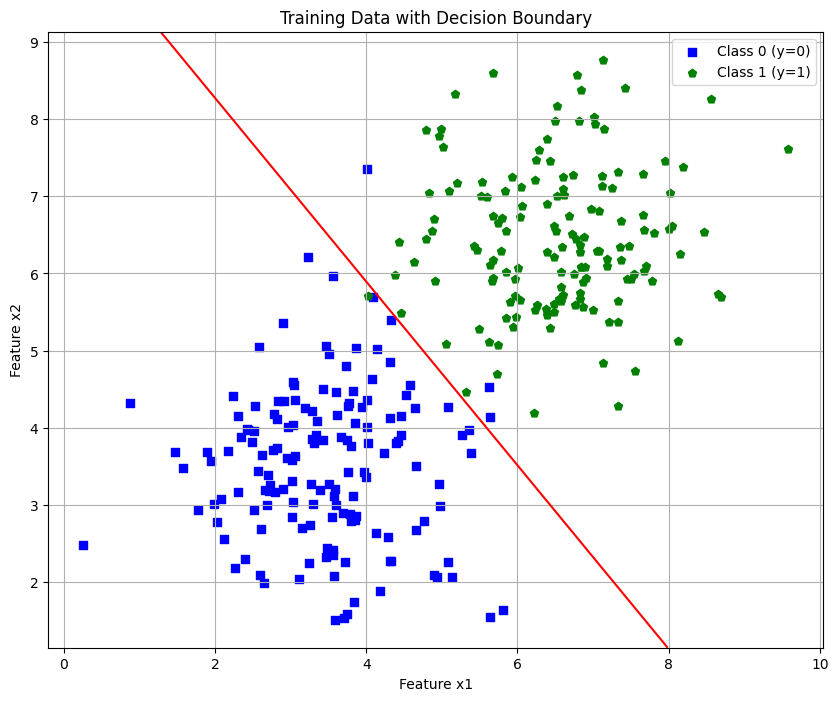

In [29]:
# Create figure
plt.figure(figsize=(10, 8))

# Plot class 0
plt.scatter(Xtrain[:P//2, 0], Xtrain[:P//2, 1],
            c='blue', marker='s', label='Class 0 (y=0)')

# Plot class 1
plt.scatter(Xtrain[P//2:, 0], Xtrain[P//2:, 1],
            c='green', marker='p', label='Class 1 (y=1)')

# Determine decision boundary (w0 + w1*x1 + w2*x2 = 0)
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

# Create meshgrid for contour plot
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))
Z = w_optimized[0] + w_optimized[1]*xx1 + w_optimized[2]*xx2
decision_boundary = (Z == 0)  # P(y=1|x) = 0.5

# Plot decision boundary
plt.contour(xx1, xx2, Z, levels=[0], colors='red', linestyles='solid')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.title('Training Data with Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


# 3.2 Loss Convergence Analysis
Plot BCE loss trajectory to monitor optimization progress.

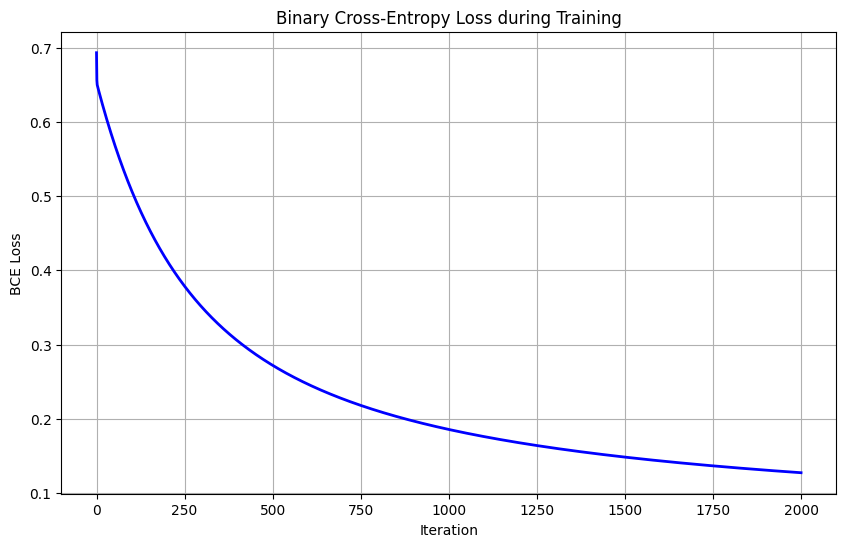

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), bce_loss, 'b-', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('BCE Loss')
plt.title('Binary Cross-Entropy Loss during Training')
plt.grid(True)
plt.show()

# 4. 3D Probability Surface
Visualize the sigmoid probability function $P(y=1|\mathbf{x})$ over the input space.


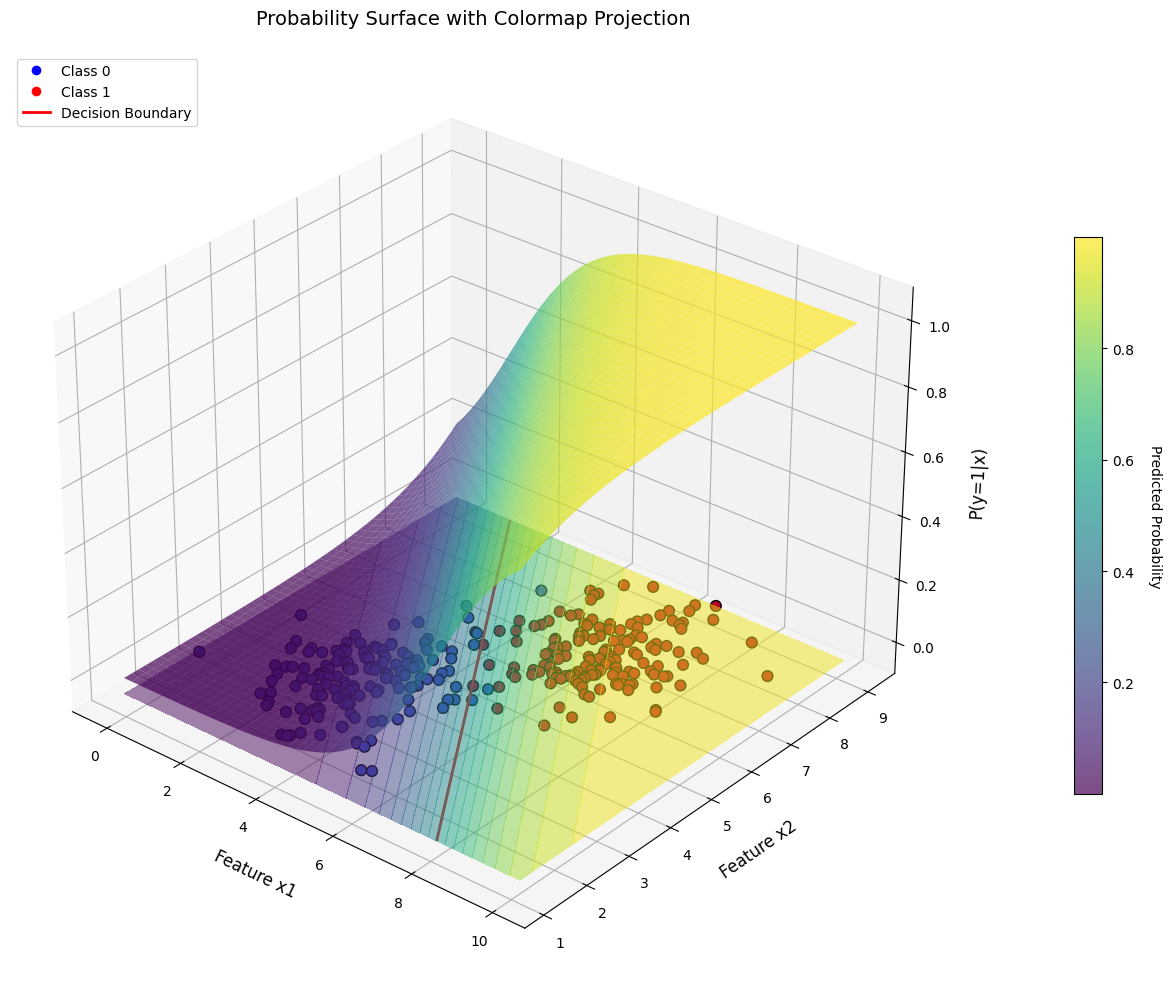

In [31]:
# Create grid for 3D surface
np_3d = 50
x1_grid, x2_grid = np.meshgrid(np.linspace(x1_min, x1_max, np_3d),
                               np.linspace(x2_min, x2_max, np_3d))

# Compute probability surface
z_grid = sigmoid(w_optimized[0] + w_optimized[1]*x1_grid + w_optimized[2]*x2_grid)

# Create enhanced 3D plot
plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')

# 1. Probability surface (viridis colormap)
surf = ax.plot_surface(x1_grid, x2_grid, z_grid,
                       cmap='viridis',
                       edgecolor='none',
                       alpha=0.7)

# 2. Add 2D colormap projection at z=0
c = ax.contourf(x1_grid, x2_grid, z_grid,
                zdir='z', offset=-0.05,
                levels=20, cmap='viridis',
                alpha=0.5)

# 3. Add decision boundary at P=0.5
boundary = ax.contour(x1_grid, x2_grid, z_grid,
                      levels=[0.5],
                      zdir='z', offset=-0.05,
                      colors='red', linewidths=2)

# 4. Data points at ground level
scatter = ax.scatter(Xtrain[:, 0], Xtrain[:, 1], np.zeros(P),
                     c=ytrain, cmap='coolwarm',
                     s=60, edgecolor='k', depthshade=False)

# 5. Labels and styling
ax.set_xlabel('Feature x1', fontsize=12, labelpad=10)
ax.set_ylabel('Feature x2', fontsize=12, labelpad=10)
ax.set_zlabel('P(y=1|x)', fontsize=12, labelpad=10)
ax.set_title('Probability Surface with Colormap Projection', fontsize=14, pad=20)
ax.set_zlim(-0.1, 1.1)  # Space for colormap projection

# 6. Colorbar and legend
cbar = plt.colorbar(surf, ax=ax, shrink=0.6, aspect=20, pad=0.1)
cbar.set_label('Predicted Probability', rotation=270, labelpad=20)

# Add legend manually
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Class 0'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Class 1'),
    plt.Line2D([0], [0], color='red', linewidth=2, label='Decision Boundary')
]
ax.legend(handles=legend_elements, loc='upper left')

# Optimized view
ax.view_init(elev=30, azim=-50)

plt.tight_layout()
plt.show()